In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import sys

# file_name = sys.argv[1]

# N_points = 100000
# n_bins = 20

# rng = np.random.default_rng(19680801)
# # Generate two normal distributions
# dist1 = rng.standard_normal(N_points)
# dist2 = 0.4 * rng.standard_normal(N_points) + 5

# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# # We can set the number of bins with the *bins* keyword argument.
# axs[0].hist(dist1, bins=n_bins)
# axs[1].hist(dist2, bins=n_bins)

In [40]:
def plot_hist(setting):
    file_name = "../"+setting+"/mlperf_log_trace.json"
    f = open(file_name, "r")
    lines = f.readlines()
    latencies = []
    for line in lines:
        if "issue_to_done" in line:
            latency = round(int(line.split(":")[-1].split("}")[0])/100000)/10
            latencies.append(latency)
    latencies_tmp = []
    for i in range(len(latencies)):
        if not i%100 and latencies[i] < 100:
            latencies_tmp.append(latencies[i])
    latencies_array = np.array(latencies_tmp)
    print(latencies_array, len(latencies_array))

    lst = setting.split(";")
    cache = lst[0][-5:]
    if cache == "0x00f":
        cache_way = "4"
    elif cache == "0x0ff":
        cache_way = "8"
    elif cache == "0xfff":
        cache_way = "12"
    mb = lst[1].split("=")[-1]

    plt.xlabel('Latency/ms')
    plt.ylabel('Instances')
    plt.title('Resnet50 Histogram of Latency (36 cores '+cache_way+'-way LLC '+mb+'% MB)')
    plt.hist(latencies_array, density=False, bins=500)
    plt.show()


[22.5 19.  19.1 ... 41.  38.7 38.2] 94223


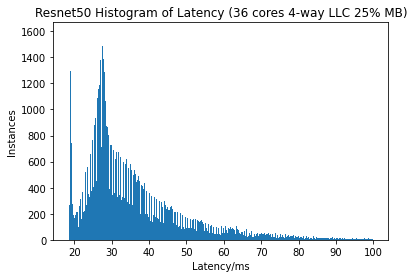

[20.2 17.6 17.2 ... 27.6 28.5 31. ] 96992


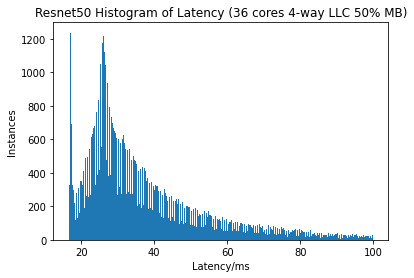

[21.3 17.  16.5 ... 32.2 25.4 36.2] 103551


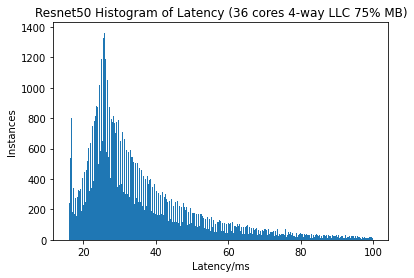

[18.5 16.9 16.6 ... 68.3 65.7 58.7] 104749


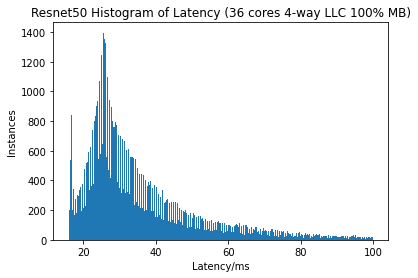

[28.  19.1 18.8 ... 32.1 27.4 25.1] 97053


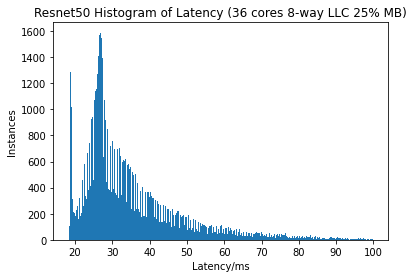

[20.1 17.3 17.2 ... 46.1 42.7 46.3] 108415


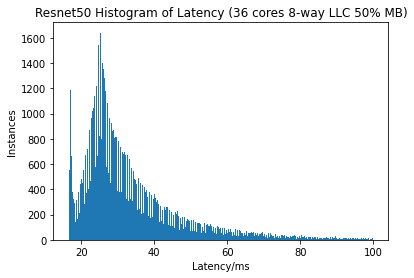

[20.8 16.9 16.6 ... 53.1 51.5 53.2] 110308


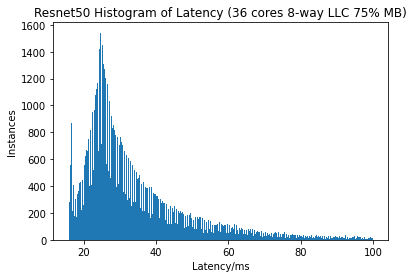

[20.1 16.7 16.4 ... 99.4 92.3 80.3] 118514


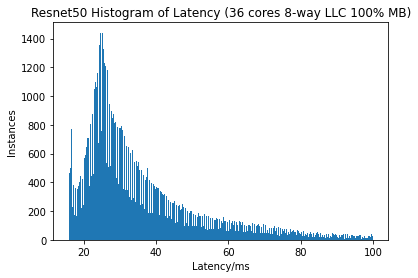

[23.2 19.  18.8 ... 29.1 30.1 35. ] 102445


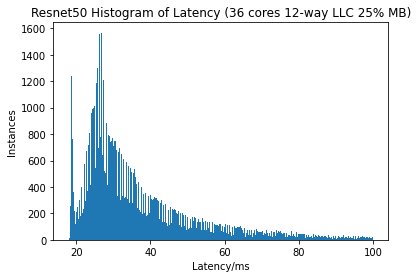

[21.3 17.  16.8 ... 43.3 32.3 28.2] 104422


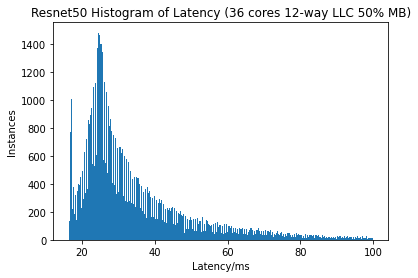

[19.5 16.7 16.2 ... 24.7 23.  25.1] 110419


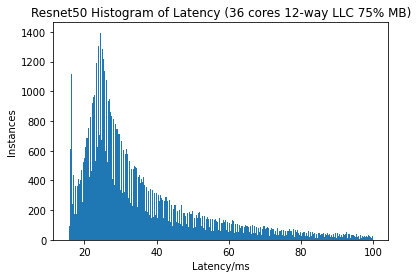

[19.1 16.8 16.2 ... 25.8 29.8 23.7] 120911


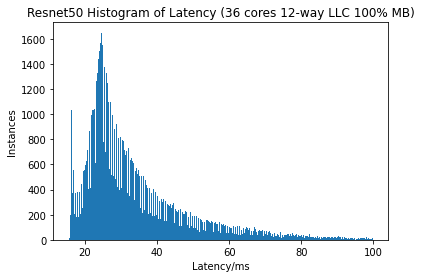

In [41]:
plot_hist("peak_output_logs_36_1_llc:1=0x00f;_mba:1=25;")
plot_hist("peak_output_logs_36_1_llc:1=0x00f;_mba:1=50;")
plot_hist("peak_output_logs_36_1_llc:1=0x00f;_mba:1=75;")
plot_hist("peak_output_logs_36_1_llc:1=0x00f;_mba:1=100;")
plot_hist("peak_output_logs_36_1_llc:1=0x0ff;_mba:1=25;")
plot_hist("peak_output_logs_36_1_llc:1=0x0ff;_mba:1=50;")
plot_hist("peak_output_logs_36_1_llc:1=0x0ff;_mba:1=75;")
plot_hist("peak_output_logs_36_1_llc:1=0x0ff;_mba:1=100;")
plot_hist("peak_output_logs_36_1_llc:1=0xfff;_mba:1=25;")
plot_hist("peak_output_logs_36_1_llc:1=0xfff;_mba:1=50;")
plot_hist("peak_output_logs_36_1_llc:1=0xfff;_mba:1=75;")
plot_hist("peak_output_logs_36_1_llc:1=0xfff;_mba:1=100;")

In [64]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

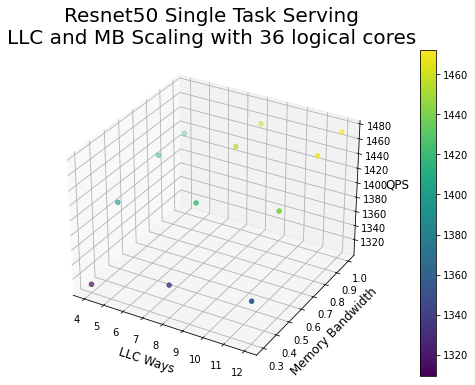

In [6]:
from numpy import size

llc = np.array([12]*4+[8]*4+[4]*4)
mb = np.array([1, 0.8, 0.5, 0.3]*3)
qps = np.array([1472.4, 1469.1, 1442, 1356.1,
                1455.1, 1452.2, 1421.4, 1342.9,
                1413.6, 1411.5, 1391.1, 1309.4])

fig = plt.figure(figsize = (16, 6))
ax = plt.axes(projection ="3d")
sctt = ax.scatter3D(llc, mb, qps, c=qps)
plt.title("Resnet50 Single Task Serving\nLLC and MB Scaling with 36 logical cores", size=20)
ax.set_xlabel('LLC Ways', size=12)
ax.set_ylabel('Memory Bandwidth', size=12)
ax.set_zlabel('QPS', size=12)
fig.colorbar(sctt, orientation="vertical")
plt.show()

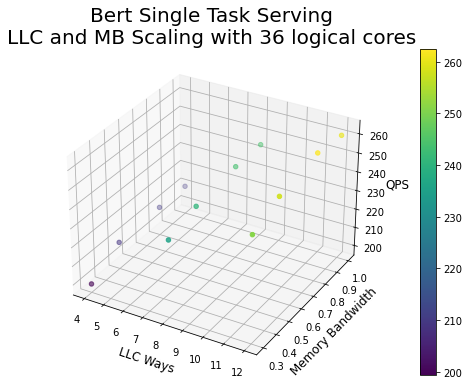

In [4]:
llc = np.array([12]*4+[8]*4+[4]*4)
mb = np.array([1, 0.8, 0.5, 0.3]*3)
qps = np.array([260.4, 262.4, 257.8, 250.9,
                244.4, 243.9, 240.7, 235.6,
                210, 210, 209.1, 199.3])

fig = plt.figure(figsize = (16, 6))
ax = plt.axes(projection ="3d")
sctt = ax.scatter3D(llc, mb, qps, c=qps)
plt.title("Bert Single Task Serving\nLLC and MB Scaling with 36 logical cores", size=20)
ax.set_xlabel('LLC Ways', size=12)
ax.set_ylabel('Memory Bandwidth', size=12)
ax.set_zlabel('QPS', size=12)
fig.colorbar(sctt, orientation="vertical")
plt.show()